# HW10 - Programming - Due April 12th Wed

### Q0 Importing packages

Begin by importing `numpy` and `scipy.stats` with the usual aliases. 

In [1]:
import scipy.stats as ss
import numpy as np

In case you'd like to do the *optional* plotting exercises, I'll go ahead an import the package `matplotlib.pyplot` with the alias `plt` for you. This is a *very* powerful package full of interesting capabilities. If you're at all interested in data visualization, it's definitely worth checking out the <a href="http://matplotlib.org/users/pyplot_tutorial.html">beginner tutorials</a> online.

The second line that begins with "%" is not Python per se. It's a command to the Jupyter Notebook instructing it to plot inside the Notebook, as opposed to opening a new window. 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Q1 Understanding randomness via simulations 

> <b>Remark</b> In the question below, I draw from the Exponential distribution parametrized with $\beta$. This is done via the code:

>> `dist = ss.expon(scale = beta)`

>> `...`

>> `dist.rvs(n)`

> Random draws generated using the code above will have expectation $\beta$ and variance $\beta^2$.

1) Explain what the code below does. In particular, make sure to explain what the variables `xs`, `beta_mom` and `beta_moms` are. Also, why do we get a different `beta_mom` at every iteration of the loop?

In [3]:
total_simulations = 1000
beta = 5
n = 10
beta_moms = []
dist = ss.expon(scale = beta)
for i in range(total_simulations):
    xs = dist.rvs(n)
    beta_mom = np.mean(xs)
    beta_moms = beta_moms + [beta_mom]

<font color="blue">

In class, we learned that we should always think of the data at hand as realizations of a *random* process: were we to draw a new set of $n$ observations, they would have been slightly different, and so would our estimates.


<br><br>
This code is illustrating this point. Every iteration of the loop begins by drawing $n$ observations from an $Exponential(\beta)$ distribution with $\beta = 5$, and then computing an estimate $\beta_{MOM}$ given the sample we drew. The collection of all $\beta_{MOM}$s is stored in the list <font face="courier">beta_moms.</font>

If we take a look at the list, we see that, indeed, we get a different estimate at every iteration.

</font>

In [4]:
print(beta_moms)

[3.3003607529537136, 3.5955358375771893, 6.2901573347004858, 3.2325216703404918, 7.0556616916816477, 3.0759192066725958, 4.468883357509112, 6.632262836649228, 5.6801218648345486, 5.7708483124441132, 6.2314890245625412, 2.1526405878944179, 3.6670597470232771, 2.408950777143481, 7.1132701656336152, 7.3281758297854109, 3.2381332638997997, 6.2439041733097902, 4.668333015646092, 5.4473482810415419, 4.4302840706853193, 4.0501130794002247, 4.2011514260965432, 5.6532854919808617, 3.9905859154910814, 4.2801852554362867, 6.4604614011501011, 3.7204486942995745, 3.8020956093152285, 7.4100282583703621, 6.0153993577531235, 5.2552243735134985, 2.3115753445434932, 3.3358719415849949, 5.0054326119117656, 2.5836705886484639, 4.2165251283717051, 5.2903797683469538, 10.160000314341037, 3.774294338826587, 7.043180100609665, 2.7173530105880723, 5.8411480747603264, 3.8712605698182969, 7.6290166897616674, 3.7995563780875168, 6.3319908803224534, 7.5480733474071204, 7.4998860420407407, 6.3178933049596813, 5.323

2) The code below produces a histogram of `beta_moms`. The optional argument `normed = True` ensures that the whole area of the histogram is 1, so we can think of it as a rough approximation of the probability distribution of `beta_moms`.

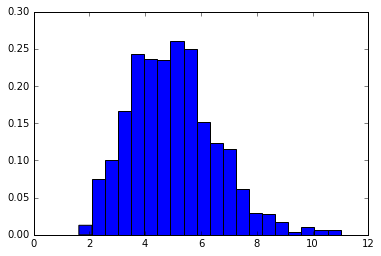

In [5]:
plt.hist(beta_moms, normed = True, bins = 20);

Change the value of `n` in the code you explained in part 1, re-run that cell, and then re-plot the histogram. Test out really small and large values of `n`. Explain what happens to the shape of the distribution for these different values of `n`, mentioning the Central Limit Theorem and Law of Large Numbers in your answer.

<b>Remark</b> If both `n` and `total_simulations` are large numbers, your code might take a long time to run!

<font color="blue">

1. By the CLT: as $n$ increases, the distribution becomes increasingly bell-shaped.
<br><br>
2. By the LLN: as $n$ increases, the distribution becomes tighter around the expectation $E[X] = \beta = 5$.
<br><br>

</font>

### Q2 [Optional - Not for credit]

Read the documentation <a href="http://matplotlib.org/users/pyplot_tutorial.html">beginner tutorials</a> and modify the code above so that the final version includes as many of these bells and whistles as you can:

+ The color of the histogram is semitransparent dark green
+ The histogram uses 50 bins, instead of the default 10
+ The title says "Distribution of beta_mom"
+ The horizontal label says "Value of beta_mom"
+ The vertical label says "Probability"

The final result could look like this, althought you're free to play around with the specifications if you like doing this sort of thing.

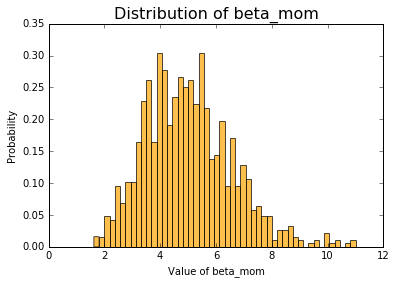

In [6]:
fig, ax = plt.subplots(1)
ax.hist(beta_moms, normed = True, color = "orange", bins = 50, alpha = .7);
ax.set_title("Distribution of beta_mom", fontsize = 16)
ax.set_ylabel("Probability")
ax.set_xlabel("Value of beta_mom")
fig.savefig("hist1")

<img src="hist1.png">

...and if you have *way* too much time in your hands, figure this one out.

<img src="hist2.png">

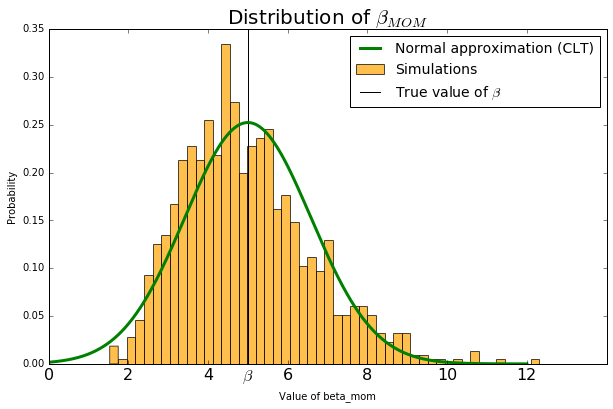

In [7]:
# Copy-and-paste from before
total_simulations = 1000
beta = 5
n = 10
beta_moms = []
dist = ss.expon(scale = beta)
for i in range(total_simulations):
    xs = dist.rvs(n)
    beta_mom = np.mean(xs)
    beta_moms = beta_moms + [beta_mom]


# Initialize a plot
fig, ax = plt.subplots(1, figsize = (10, 6))

# Plot the histogram of beta_moms with desired specifications
ax.hist(beta_moms, normed = True, color = "orange", bins = 50, alpha = .7, label = "Simulations");

# Plot the approximate pdf of beta_mom
x = np.linspace(0, 12, 1000)  # 1000 equally-spaced (i.e., linearly-spaced) points btw 0 and 12
px = ss.norm(beta, np.sqrt(beta**2/n)).pdf(x)
ax.plot(x, px, linewidth = 3, color = "green", label = "Normal approximation (CLT)")

# Plot a vertical line to indicate the true value
ax.vlines(beta, 0, 0.35, label = "True value of $\\beta$")

# Frills: title, vertical and horizontal axes labels, personalized ticks...
ax.set_title("Distribution of $\\beta_{MOM}$", fontsize = 20)
ax.set_ylabel("Probability")
ax.set_xlabel("Value of beta_mom")
ax.set_xticks([0,2,4,5,6,8,10,12])
ax.set_xticklabels([0,2,4,"$\\beta$",6,8,10,12], fontsize = 16)

# Add a legend
ax.legend(fontsize = 14)